In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('solar_power_output.csv')
df.head()

,temperature,humidity,solar_irradiance,wind_speed,solar_power_output
0,19.363503,75.852937,266.619636,5.190818,128.101772
1,33.767858,62.887709,587.710853,4.791819,290.911789
2,28.299849,44.762209,885.651252,0.256421,442.336390
3,24.966462,85.103602,759.002398,3.412478,380.261988
4,13.900466,74.778494,825.905033,3.801956,415.931953


In [3]:
# Features and target variable
X = df[['temperature', 'humidity', 'solar_irradiance', 'wind_speed']]
y = df['solar_power_output']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
# Predicting the solar power output
y_pred = model.predict(X_test)

print(y_pred)

[145.57713107  58.80813607 162.02529472 389.82145928 499.91950594
 201.0282157  280.32773311 343.94995963 207.65845171 274.08855807
 270.4758993   71.45181397 429.2717113  474.93452177 131.00879232
 488.72382531 351.97648481  66.01156114 286.53039285 315.26996554
 156.25649583 217.68415494 328.50926609 456.09724416 224.5996492
 343.33441394 258.65661936 253.27035924 487.33886964 488.13938702
 352.87341423 139.35221981 486.2457442  166.59050109 443.99714231
 498.93693591 440.23818941 184.21480104 497.81182991 239.22808162
 345.26650268 281.34107991 215.84679473 472.53738059 105.19383876
 353.92961078 132.62179771 496.30985098 472.03357268 464.32390435
  68.39576647 337.05784428 271.45779664 142.00782194 330.57420011
 209.16463829 431.33413852 460.5254782  271.68335513 148.17216826
 322.32496321 189.54364635 148.80585848  54.32626697 477.68708932
 193.09857442 327.78450176 155.94903389 486.49330331  81.90369754
 249.1025331  257.83534344 494.00652549 228.57425188 379.22282528
 370.054837

In [7]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 29.462345968246385
R-squared: 0.9983255901416407


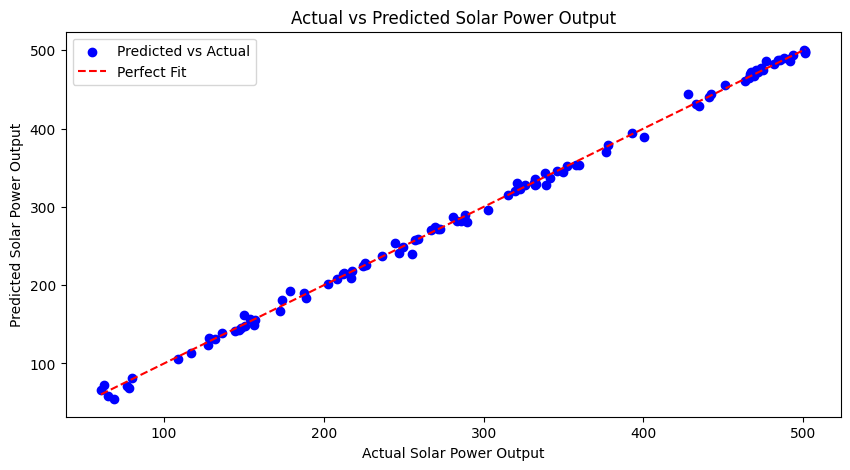

In [8]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Perfect fit line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit')

plt.xlabel("Actual Solar Power Output")
plt.ylabel("Predicted Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output")
plt.legend()
plt.show()

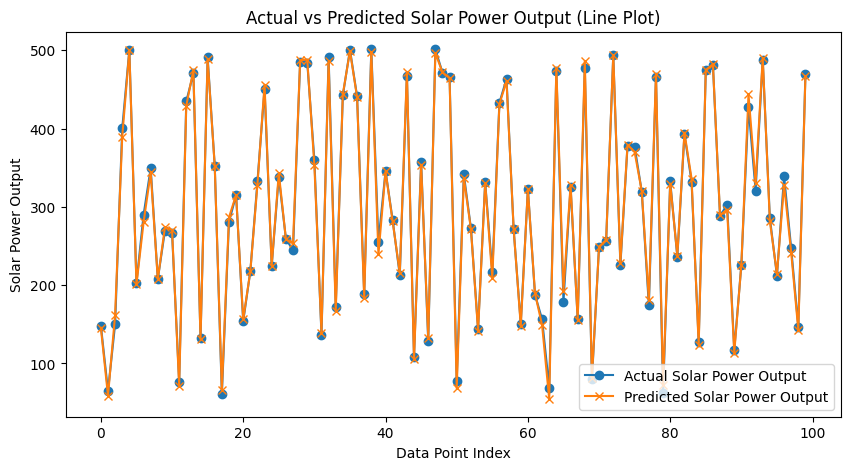

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test,
         label="Actual Solar Power Output", marker='o')

plt.plot(range(len(y_test)), y_pred,
         label="Predicted Solar Power Output", marker='x')

plt.xlabel("Data Point Index")
plt.ylabel("Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output (Line Plot)")
plt.legend()
plt.show()

In [10]:
joblib.dump(model, 'solar_power_prediction_model.pkl')

['solar_power_prediction_model.pkl']

In [11]:
df.columns

Index(['temperature', 'humidity', 'solar_irradiance', 'wind_speed',
       'solar_power_output'],
      dtype='object')

In [12]:
# Predict
temp = float(input("Enter the temperature: "))
hum = float(input("Enter the humidity:"))
solar = float(input("Enter the solar irradiance: "))
wind = float(input("Enter the wind speed: "))

new_data = np.array([[temp, hum, solar, wind]])

predicted_output = model.predict(new_data)

print(f"Predicted Solar Power Output: {predicted_output[0]:.2f} watts")

Predicted Solar Power Output: 5.46 watts


/home/rashmin/Codeshit/techsaksham/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
